In [1]:
%matplotlib notebook
from profit_maximization import *
random.seed(5000)
import pickle

instance_base = generate_base_instance(40)
coin_flip_params_wo_gamma = get_coin_flip_params_wo_gamma()
instance_partial = flip_coins_wo_gamma(instance_base,coin_flip_params_wo_gamma)
coin_flip_params = get_coin_flip_params_w_gamma(coin_flip_params_wo_gamma,1000)
instance = flip_coins_w_gamma(instance_partial,coin_flip_params)
get_stats(0,instance)
experiment_params = {'DISCOUNT_SETTING':'detour_based','GAMMA':.4}
solution,total_profit = solve_instance(0,instance,experiment_params)
for k in solution:
    print(k,solution[k])

Coeff 1000: Coin flip 0: Stats: (Provider market share w/o Gamma) requests IN: 23, OUT: 17
Coeff 1000: Coin flip 0: Experiment Gamma = 0.4. Total profit: 25214.0017641. Size of matching graph: 6. #Total ridesharers: 32
('unmatched_requests', [0, 1, 3, 4, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20, 21, 24, 25, 26, 29, 31, 32, 34, 39])
('matching_graph', <networkx.classes.graph.Graph object at 0x000000000A55DFD0>)
('matched_request_pairs_with_permutations', {(17, 37): ('sj', 'si', 'di', 'dj'), (27, 33): ('sj', 'si', 'di', 'dj'), (23, 35): ('si', 'sj', 'di', 'dj')})
('non_ridesharing_requests', [2, 5, 7, 22, 28, 30, 36, 38])


C:\Users\q4fj4lj9\AppData\Local\Continuum\Miniconda\lib\site-packages\IPython\kernel\__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [2]:
def profit_stats_given_requests(r1,r2,instance,experiment_params):
    request_arr = [r1,r2]
    for r in request_arr:
        print 'Indiv.     non RS profit from {0}:\t{1}'.format(r,get_profit_non_ride_sharing([r],instance))
        print 'Indiv. RS unmatched profit from {0}:\t{1}'.format(r,get_profit_unmatched([r],instance))
    print 'Rideshare incremental profit from {0} and {1}: {2}'.format(r1,r2,get_incremental_profit([r1,r2],instance,experiment_params))
    
for k in solution['matched_request_pairs_with_permutations']:
    profit_stats_given_requests(k[0],k[1],instance,experiment_params)

Indiv.     non RS profit from 17:	686.895188511
Indiv. RS unmatched profit from 17:	457.930125674
Indiv.     non RS profit from 37:	913.153875313
Indiv. RS unmatched profit from 37:	608.769250209
Rideshare incremental profit from 17 and 37: [1007.6002375374499, ('sj', 'si', 'di', 'dj')]
Indiv.     non RS profit from 27:	897.621858023
Indiv. RS unmatched profit from 27:	598.414572015
Indiv.     non RS profit from 33:	1090.36691072
Indiv. RS unmatched profit from 33:	726.911273815
Rideshare incremental profit from 27 and 33: [1583.8269300735244, ('sj', 'si', 'di', 'dj')]
Indiv.     non RS profit from 23:	1005.11193407
Indiv. RS unmatched profit from 23:	670.07462271
Indiv.     non RS profit from 35:	787.464284904
Indiv. RS unmatched profit from 35:	524.976189936
Rideshare incremental profit from 23 and 35: [60.856250100155989, ('si', 'sj', 'di', 'dj')]


<IPython.core.display.Javascript object>


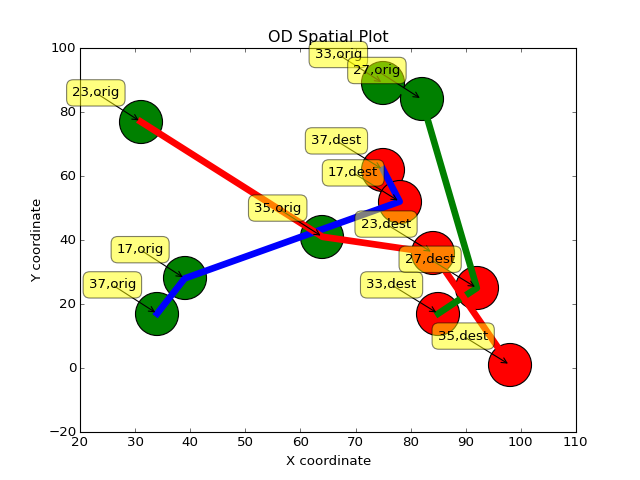

case2: 17,37:('sj', 'si', 'di', 'dj')
case2: 27,33:('sj', 'si', 'di', 'dj')
case1: 23,35:('si', 'sj', 'di', 'dj')


In [5]:
import matplotlib
import matplotlib.pyplot as plt

plot_rs_matched = True
if plot_rs_matched == True:
    temp_request_set = set()
    for k in solution['matched_request_pairs_with_permutations']:
        temp_request_set.add(k[0])
        temp_request_set.add(k[1])
    data = {x:instance['all_requests'][x] for x in temp_request_set}
else:        
    data = {x:instance['all_requests'][x] for x in instance['all_requests'] if instance['all_requests'][x]['RIDE_SHARING'][experiment_params['GAMMA']]==True}

N = len(data)
labels = ['{0}'.format(i) for i in data]

fig = plt.figure()
ax = fig.add_subplot(111)

pd = {'orig':'green','dest':'red'}
for loc in pd:
    x = [data[z][loc][0] for z in data]
    y = [data[z][loc][1] for z in data]

#     plt.scatter(x, y, s=80, c=pd[loc], marker="o")

    ax.scatter(x, y, marker = 'o', 
        c = pd[loc], s = 1500,
        cmap = plt.get_cmap('Spectral'))
    for label, x, y in zip(labels, x, y):
        ax.annotate(
            label+','+loc, 
            xy = (x, y), xytext = (-20, 20),
            textcoords = 'offset points', ha = 'right', va = 'bottom',
            bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
            arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

data_matched = solution['matched_request_pairs_with_permutations']
for p,q in data_matched:
    if instance['instance_params']['all_permutations_two'][data_matched[(p,q)]]=='case1':
        print "case1: {0},{1}:{2}".format(p,q,data_matched[(p,q)])
        if data_matched[(p,q)][0] == 'sj':
            (p,q) = (q,p)
        ax.plot([data[p]['orig'][0],data[q]['orig'][0],data[p]['dest'][0],data[q]['dest'][0]],\
                [data[p]['orig'][1],data[q]['orig'][1],data[p]['dest'][1],data[q]['dest'][1]],linewidth=6)
    elif instance['instance_params']['all_permutations_two'][data_matched[(p,q)]]=='case2':
        print "case2: {0},{1}:{2}".format(p,q,data_matched[(p,q)])
        if data_matched[(p,q)][0] == 'sj':
            (p,q) = (q,p)
        ax.plot([data[p]['orig'][0],data[q]['orig'][0],data[q]['dest'][0],data[p]['dest'][0]],\
                [data[p]['orig'][1],data[q]['orig'][1],data[q]['dest'][1],data[p]['dest'][1]],linewidth=6)

        
            

            

plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.title('OD Spatial Plot')
plt.show()